# Fatos estilizados

## Verificaçao de caudas pesadas em series de preços da soja

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%run Funcoes.ipynb

In [2]:
soja_local = pd.read_excel(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Basis\Excel Preço local Barreiras.xlsx')
soja_local

,Data,Preço
0,2012-01-02,41.5
1,2012-01-03,41.5
2,2012-01-04,41.5
3,2012-01-05,41.5
4,2012-01-06,41.5
...,...,...
2644,2024-08-26,114.88
2645,2024-08-27,114.63
2646,2024-08-28,116.88
2647,2024-08-29,117.63


In [3]:
soja_local['Preço'].describe()

count     2649
unique     489
top         63
freq       163
Name: Preço, dtype: int64

In [4]:
soja_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    2649 non-null   datetime64[ns]
 1   Preço   2649 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 41.5+ KB


### Tratando os valores e colunas

In [5]:
soja_local = soja_local.rename(columns={'Data':'DATA'})
soja_local = soja_local.set_index('DATA')
soja_local['Preço'] = pd.to_numeric(soja_local['Preço'], errors='coerce')
soja_local.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2649 entries, 2012-01-02 to 2024-08-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preço   2648 non-null   float64
dtypes: float64(1)
memory usage: 41.4 KB


### Visualizando os preços ao longo do tempo

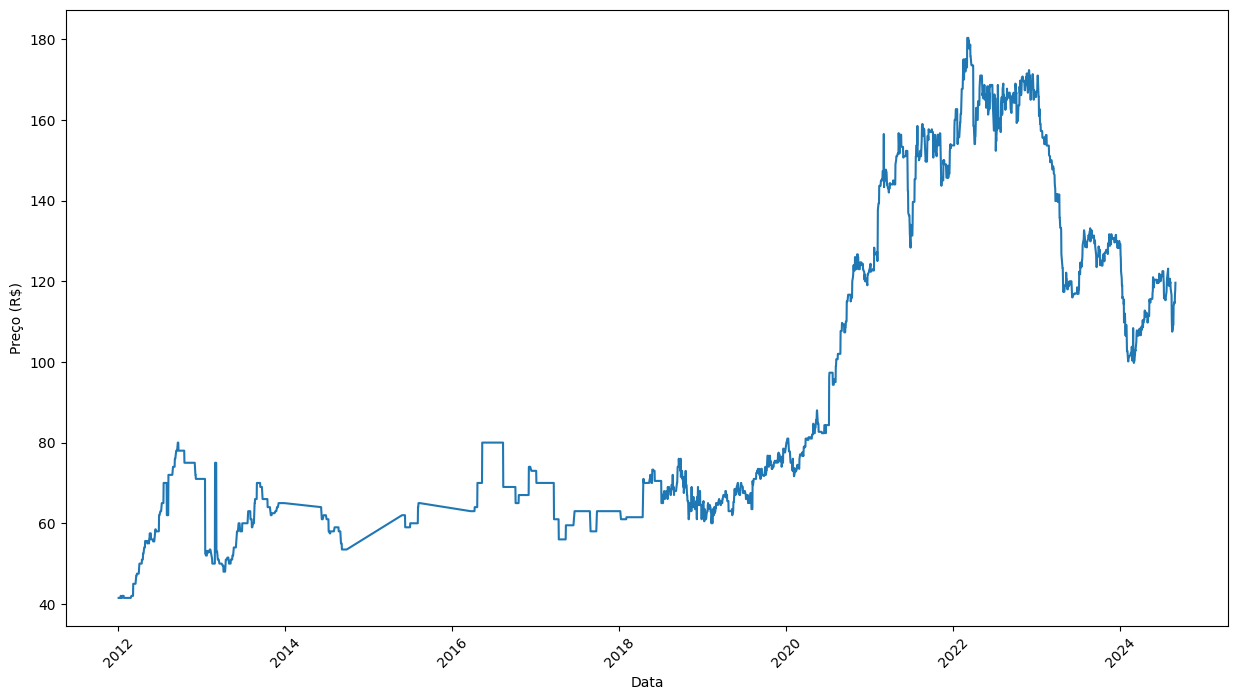

In [6]:
plt.figure(figsize=(15,8))
plt.plot(soja_local['Preço'])
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.show()

In [7]:
#Retirando valores NaN

soja_local.dropna(subset=['Preço'],inplace=True)
soja_local = soja_local.rename(columns={'Preço':'PRECOLOCAL'})

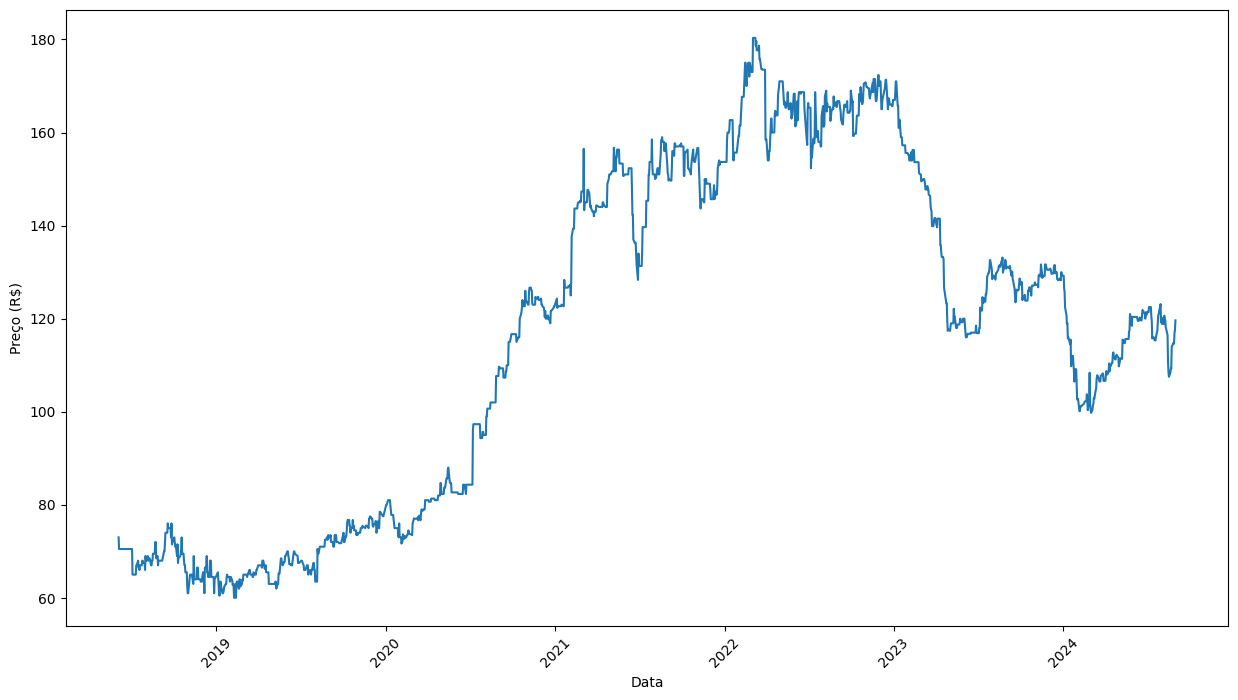

In [8]:
soja_local = soja_local.loc['2018-06-01':]


plt.figure(figsize=(15,8))
plt.plot(soja_local['PRECOLOCAL'])
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.show()

### Calculando os retornos

In [9]:
soja_local['RETORNO'] = soja_local.PRECOLOCAL.pct_change()
soja_local.dropna(subset=['RETORNO'],inplace=True)

soja_local

,PRECOLOCAL,RETORNO
DATA,,
2018-06-05,70.50,-0.034247
2018-06-06,70.50,0.000000
2018-06-07,70.50,0.000000
2018-06-08,70.50,0.000000
2018-06-11,70.50,0.000000
...,...,...
2024-08-26,114.88,0.006571
2024-08-27,114.63,-0.002176
2024-08-28,116.88,0.019628


### Histograma

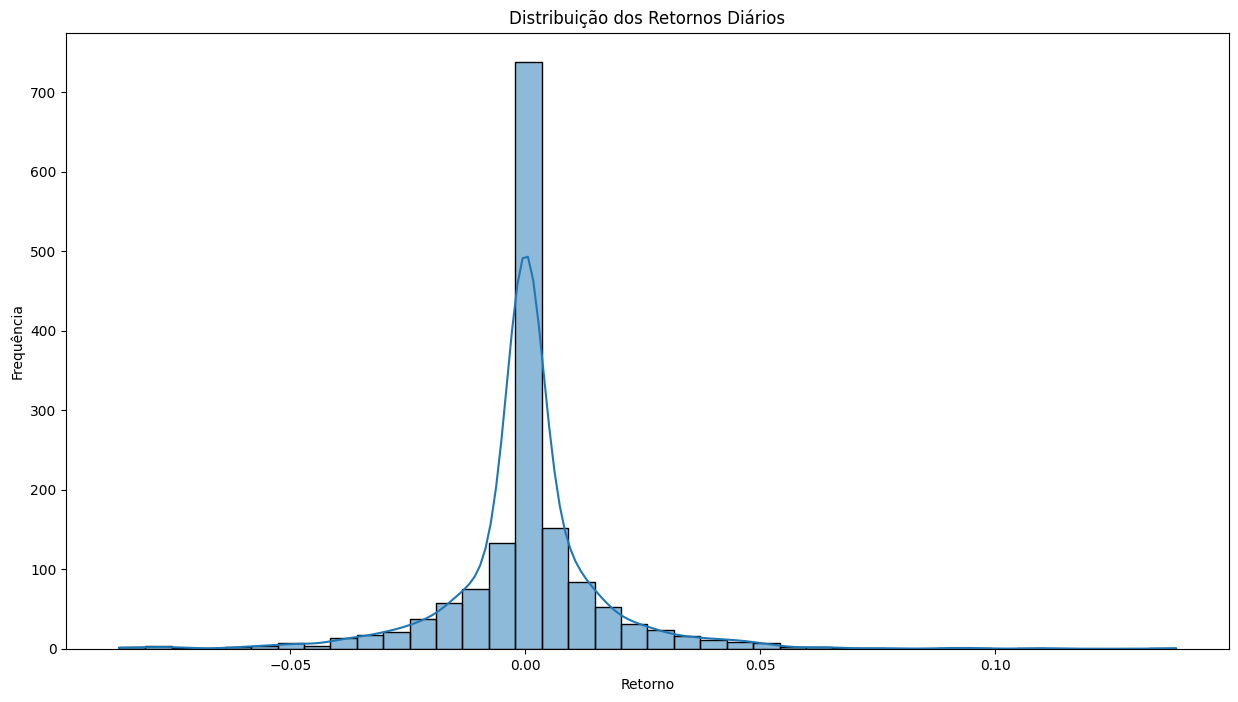

In [10]:
# Plotar o histograma dos retornos
plt.figure(figsize=(15, 8))
sns.histplot(soja_local.RETORNO, bins=40, kde=True)
plt.title('Distribuição dos Retornos Diários')
plt.xlabel('Retorno')
plt.ylabel('Frequência')
plt.show()

### Curtose e Assimetria

In [11]:
curtose_local = soja_local.RETORNO.kurtosis()
assimetria_local = soja_local.RETORNO.skew()

print(f'Curtose: {curtose_local}')
print(f'Assimetria: {assimetria_local}')


Curtose: 10.090983307335584
Assimetria: 0.48199735957611795


### Caudas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


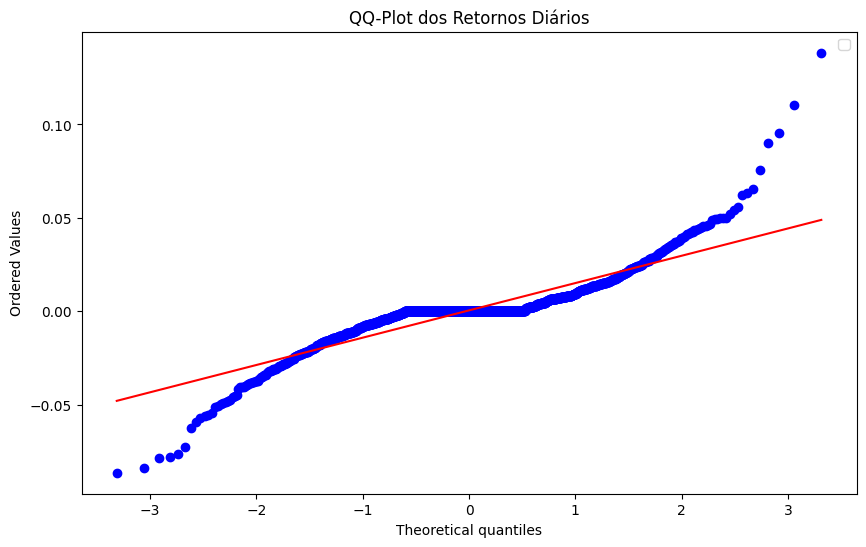

In [12]:
import scipy.stats as stats

# QQ-plot
plt.figure(figsize=(10, 6))
plt.legend()
stats.probplot(soja_local.RETORNO, dist="norm", plot=plt)
plt.title('QQ-Plot dos Retornos Diários')
plt.show()


## Assimetria entre ganhos e perdas

### Carregando os dados de preços da Soja em Sorriso-MT

In [13]:
soja_sorriso = pd.read_excel(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Series_Precos\Sorriso_jan21-set24.xlsx')

soja_sorriso.head()

,Cidade,Data,Valor,Unidade
0,Sorriso,2021-01-11,151.193366,Reais por saca
1,Sorriso,2021-01-12,152.695531,Reais por saca
2,Sorriso,2021-01-13,148.774896,Reais por saca
3,Sorriso,2021-01-14,148.430713,Reais por saca
4,Sorriso,2021-01-15,149.769147,Reais por saca


In [14]:
soja_sorriso.set_index(soja_sorriso['Data'], drop=False, inplace=True)
soja_sorriso.drop(columns=['Data', 'Cidade', 'Unidade'], inplace=True)
soja_sorriso.rename({'Valor': 'Preco'}, axis=1, inplace=True)

soja_sorriso.head()

,Preco
Data,
2021-01-11,151.193366
2021-01-12,152.695531
2021-01-13,148.774896
2021-01-14,148.430713
2021-01-15,149.769147


### Calculando retornos

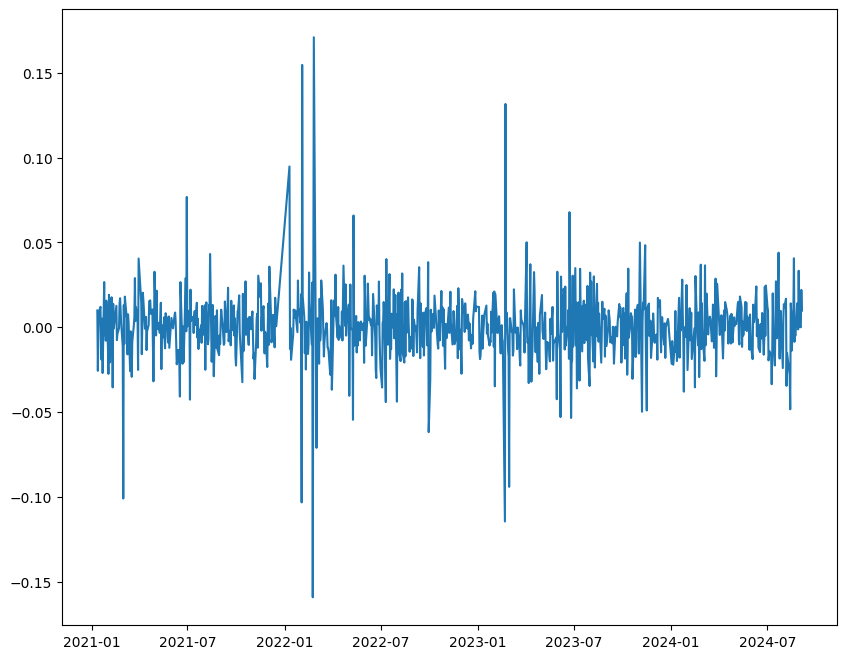

In [15]:
retornos_sorriso = soja_sorriso.pct_change().dropna()
plt.figure(figsize=(10,8))
plt.plot(retornos_sorriso)
plt.show()

In [16]:
skew_retornos = retornos_sorriso.skew()
print(f"Coeficiente de assimetria: {skew_retornos}")

Coeficiente de assimetria: Preco    0.432348
dtype: float64


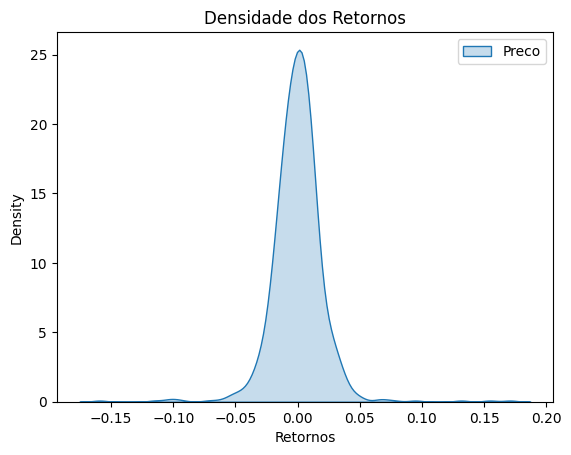

In [18]:
sns.kdeplot(retornos_sorriso, fill=True)
plt.title('Densidade dos Retornos')
plt.xlabel('Retornos')
plt.show()

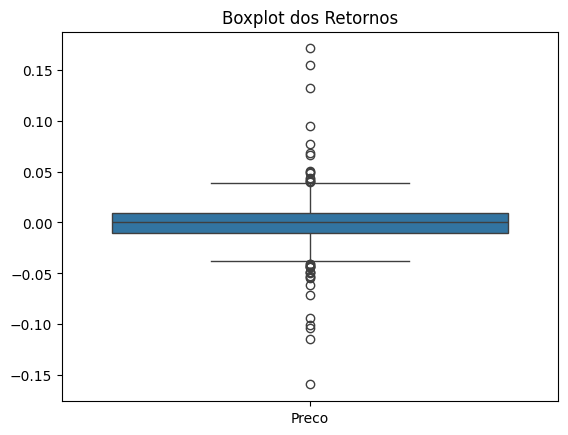

In [20]:
sns.boxplot(retornos_sorriso)
plt.title('Boxplot dos Retornos')
plt.show()